# Predictive Analytics

In [1]:
import pandas as pd
df=pd.read_csv('merged_df.csv')

## 1. Data Splitting

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Target and Features
target = 'price'
X = df.drop(columns=[target])
y = df[target]

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Preprocessing
categorical_cols = ['airline', 'source_city', 'destination_city', 'departure_time', 
                    'arrival_time', 'specific_stops', 'general_stops', 'class']
numerical_cols = ['duration']

In [7]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

## 2. Model Selection

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
# Linear Regression Model
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [10]:
# Random Forest Model with Hyperparameter Tuning
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [12]:
rf_param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error')

## 3. Model Training

In [13]:
# Train Linear Regression
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'specific_stops',
                                                   'general_stops',
                                                   'class'])])),
                ('regressor', LinearRegression())])

In [14]:
# Train and Tune Random Forest
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['duration']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['airline',
                                                                          'source_city',
                                                                          'destination_city',
                                                                          'departure_time',
                                                                          'arrival_time',
                                                                          'specific_stops',
                                                                          'general_stops',
                                                                          'class'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [16]:
# Best Random Forest Model
best_rf_model = rf_grid_search.best_estimator_

## 4. Model Evaluation

In [18]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([56427.52949664,  3838.39347947, 10512.46172503, ...,
       53992.74950919,  6967.1901143 , -3027.9315023 ])

In [19]:
rf_preds = best_rf_model.predict(X_test)
rf_preds

array([62437.8874433 ,  5279.72527021, 15230.6798244 , ...,
       49133.47731658,  5863.73481629,  3319.15294153])

In [20]:
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Linear Regression RMSE: {lr_rmse}, R^2: {lr_r2}")
print(f"Random Forest RMSE: {rf_rmse}, R^2: {rf_r2}")
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")

Linear Regression RMSE: 6919.537908194572, R^2: 0.9040914465329304
Random Forest RMSE: 3509.726100956865, R^2: 0.9753254292698122
Best Random Forest Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}


## 5. Prediction

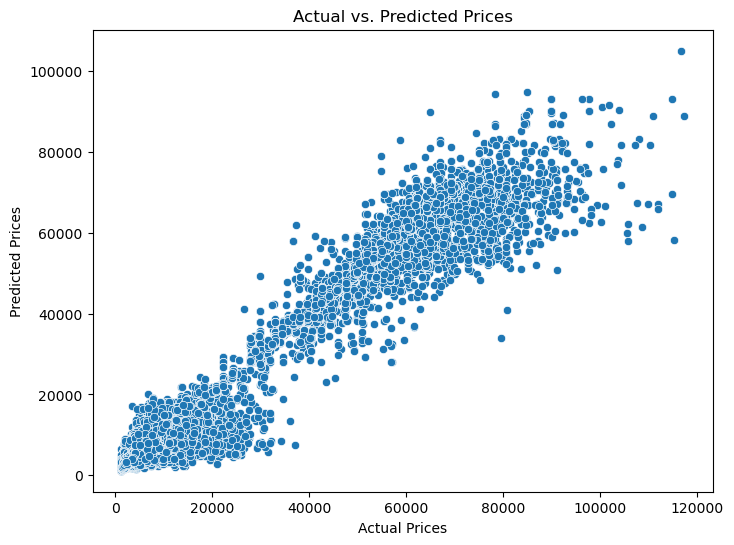

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

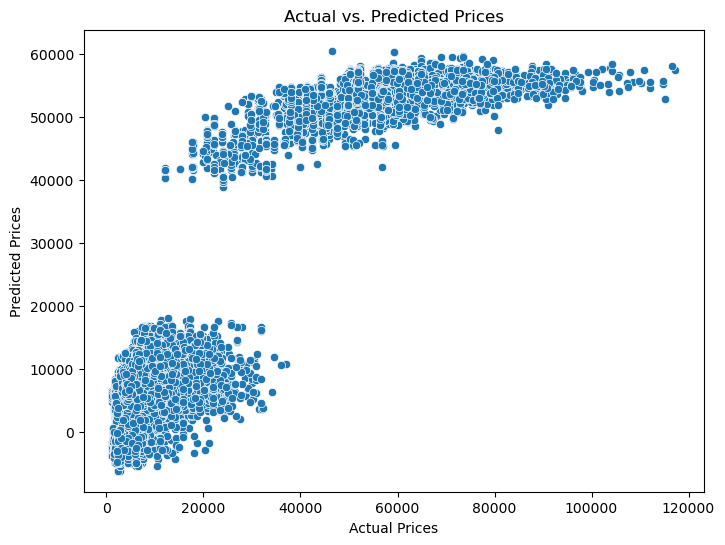

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()